## Imports

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

## Data

In [70]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission_id = test['PassengerId']

In [71]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [73]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Visualization

<AxesSubplot:xlabel='Transported', ylabel='count'>

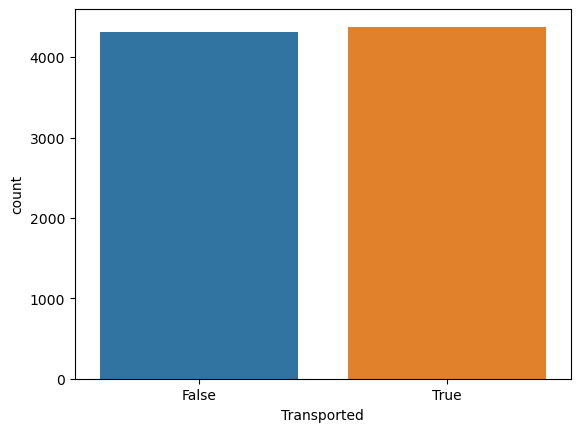

In [74]:
sns.countplot(x = 'Transported', data = train)

<AxesSubplot:xlabel='VIP', ylabel='count'>

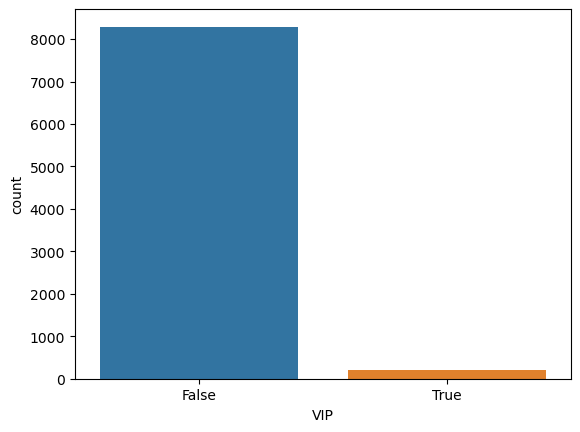

In [75]:
sns.countplot(x = 'VIP', data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

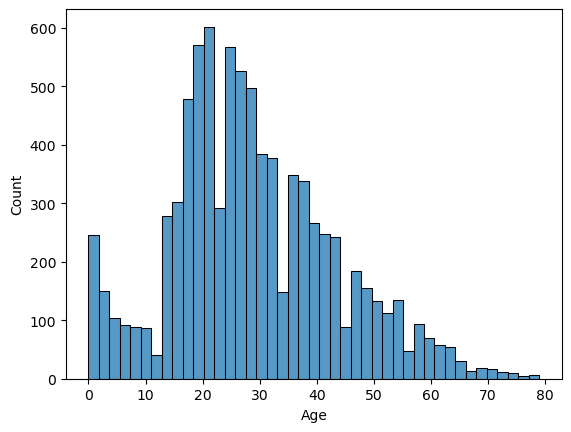

In [76]:
sns.histplot(x = 'Age', data = train)

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

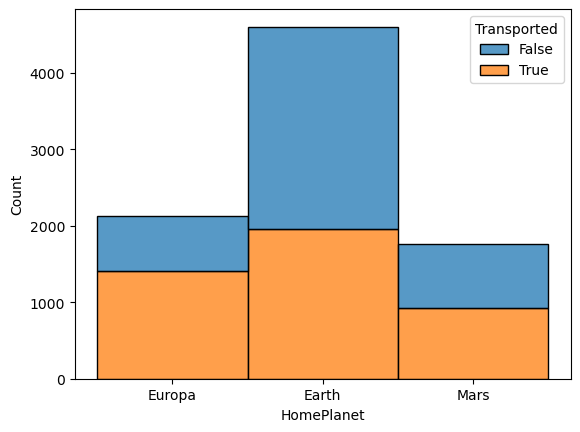

In [77]:
sns.histplot(x = 'HomePlanet', hue = train['Transported'], multiple = 'stack', data = train)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

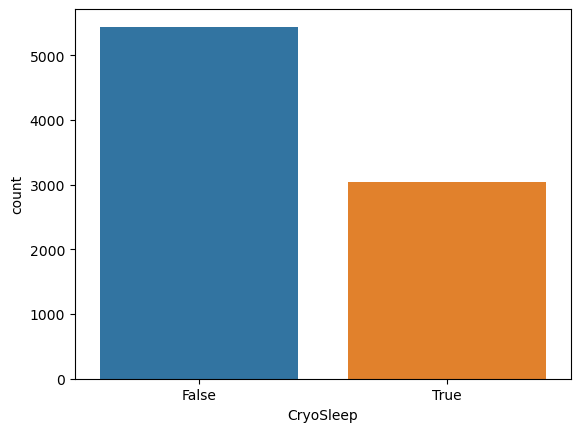

In [78]:
sns.countplot(x = 'CryoSleep', data = train)

<AxesSubplot:xlabel='Destination', ylabel='count'>

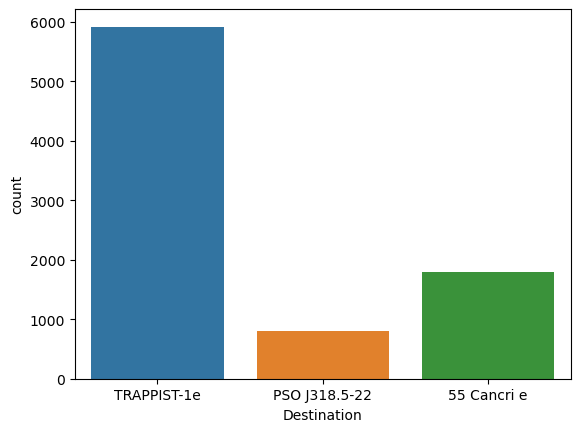

In [79]:
sns.countplot(x = 'Destination', data = train)

<AxesSubplot:>

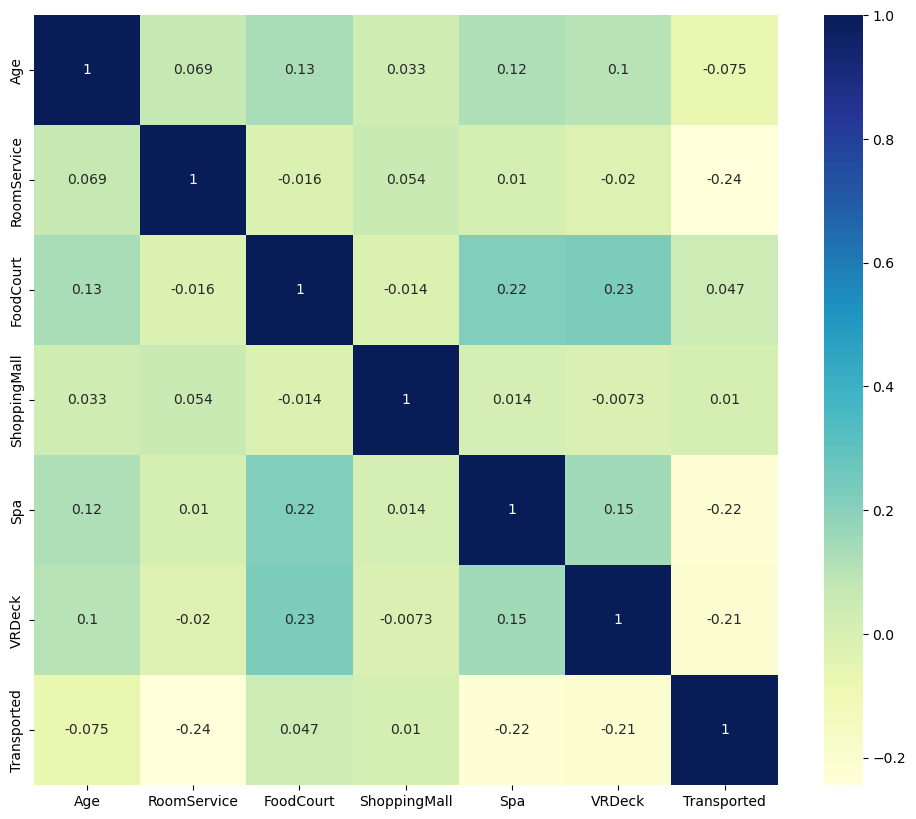

In [80]:
matriz_corr = train.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(matriz_corr, cmap='YlGnBu', annot = True)

## I will process the train/test data

In [81]:
train.drop(['Name', 'PassengerId'], axis = 1, inplace = True)
test.drop(['Name', 'PassengerId'], axis = 1, inplace = True)

In [82]:
# null data

def null(df):
    for i in df.columns:
        if df[i].isnull().any():
            if df[i].dtypes == 'O':
                df[i].fillna('Unknow', inplace = True)
            else:
                df[i].fillna(value = 0, inplace = True)
null(train)
null(test)

In [83]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [84]:
# float to int
float_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
for l in float_list:
    train[l] = train[l].astype(int)
    test[l] = test[l].astype(int)

In [85]:
train.dtypes

HomePlanet      object
CryoSleep       object
Cabin           object
Destination     object
Age              int32
VIP             object
RoomService      int32
FoodCourt        int32
ShoppingMall     int32
Spa              int32
VRDeck           int32
Transported       bool
dtype: object

In [86]:
# split cabin
train[["Deck", "Cabin_num", "Side"]] = train["Cabin"].str.split("/", expand = True)
test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand = True)

In [87]:
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [88]:
# The column has bool and str values, this will solve
train['CryoSleep'] = train['CryoSleep'].astype(str)
train['VIP'] = train['VIP'].astype(str)

test['CryoSleep'] = train['CryoSleep'].astype(str)
test['VIP'] = test['VIP'].astype(str)

In [89]:
# Passing object values to numeric
from sklearn.preprocessing import LabelEncoder

list_str = train.select_dtypes(include = 'object').columns

le = LabelEncoder()

for c in list_str:
    train[c] = le.fit_transform(train[c])
    test[c] = le.fit_transform(test[c])


In [90]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,1,0,2,39,0,0,0,0,0,0,False,1,0,0
1,0,0,2,24,0,109,9,25,549,44,True,5,0,1
2,1,0,2,58,1,43,3576,0,6715,49,False,0,0,1
3,1,0,2,33,0,0,1283,371,3329,193,False,0,0,1
4,0,0,2,16,0,303,70,151,565,2,True,5,1,1


## Separating the data into train and test

In [91]:
from sklearn.model_selection import train_test_split

X = train.drop('Transported', axis = 1)
y = train['Transported']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Training

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth = 5)

gbc.fit(xtrain, ytrain)
predict = gbc.predict(xtest)

## Results

In [93]:
from sklearn.metrics import accuracy_score

pd.crosstab(ytest, predict, rownames = ['Real'], colnames = ['Predito'], margins = True)

Predito,False,True,All
Real,,,
False,844,214,1058
True,189,927,1116
All,1033,1141,2174


In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia = accuracy_score(ytest, predict)
print('Acurácia: %f' % acuracia)

precision = precision_score(ytest, predict)
print('Precision: %f' % precision)

recall = recall_score(ytest, predict)
print('Recall: %f' % recall)

f1 = f1_score(ytest, predict)
print('F1-Score: %f' % f1)

Acurácia: 0.814627
Precision: 0.812445
Recall: 0.830645
F1-Score: 0.821444


## Creating a dataframe with the predictions

In [95]:
predict_test = gbc.predict(test)
n_predictions = (predict_test > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

## Final Result

In [96]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')

sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('submission.csv', index = False)

In [97]:
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


_